In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('./archive/balanced_dataset.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [4]:
data.shape

(16426, 11)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.keys()

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB


Handling ID

In [8]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [9]:
data.shape

(16426, 9)

In [10]:
data['isFraud'].value_counts()

isFraud
1    8213
0    8213
Name: count, dtype: int64

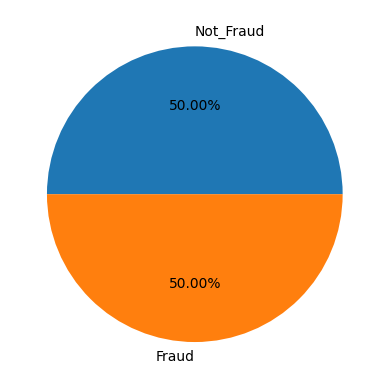

In [11]:
plt.pie(data['isFraud'].value_counts(),labels=['Not_Fraud','Fraud'],autopct='%0.2f%%')
plt.show()

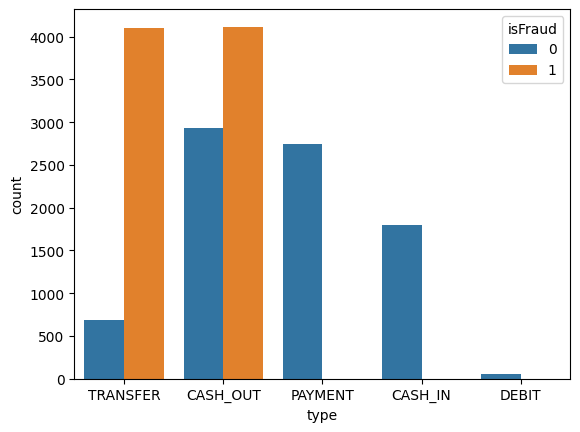

In [12]:
#sns.countplot('isFraud',data=data)
sns.countplot(data=data, x="type", hue="isFraud")
plt.show()

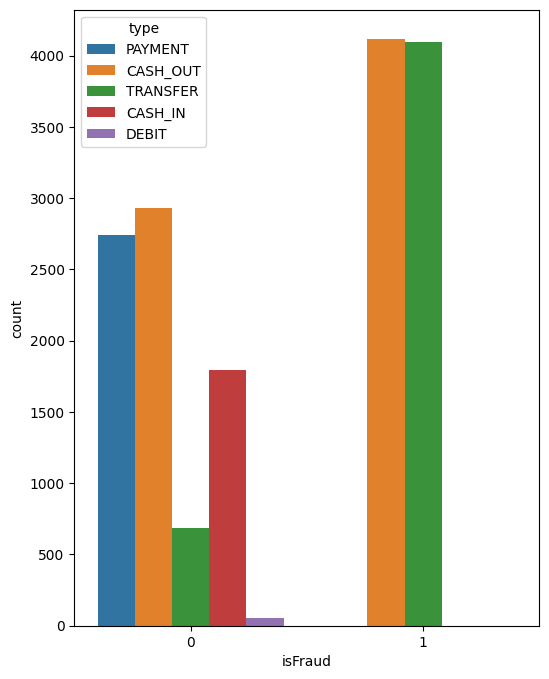

In [13]:
plt.figure(figsize=(6,8))
sns.countplot(data=data, x="isFraud", hue="type")
plt.show()

In [14]:
data.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
16421,16,PAYMENT,7103.96,20104.0,13000.04,0.00,0.00,0,0
16422,140,CASH_OUT,43690.08,870.0,0.00,3731535.62,3775225.70,0,0
16423,230,CASH_OUT,154215.09,21145.0,0.00,10486462.63,10640677.72,0,0
16424,181,CASH_IN,79479.73,34497.0,113976.73,6386.08,0.00,0,0
16425,233,PAYMENT,18123.97,0.0,0.00,0.00,0.00,0,0


In [15]:
data['type'].value_counts()

type
CASH_OUT    7049
TRANSFER    4786
PAYMENT     2741
CASH_IN     1795
DEBIT         55
Name: count, dtype: int64

PreProcessing

In [16]:
dict1={'CASH_OUT':0,'TRANSFER':1,'PAYMENT':2,'CASH_IN':3,'DEBIT':4}

In [17]:
data['type']=data['type'].map(dict1)

In [20]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,181.0,181.0,0.0,0.0,0.0,1,0
1,1,0,181.0,181.0,0.0,21182.0,0.0,1,0
2,1,1,2806.0,2806.0,0.0,0.0,0.0,1,0
3,1,0,2806.0,2806.0,0.0,26202.0,0.0,1,0
4,1,1,20128.0,20128.0,0.0,0.0,0.0,1,0


In [21]:
X=data.drop('isFraud',axis=1)

In [22]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,1,181.00,181.0,0.00,0.00,0.00,0
1,1,0,181.00,181.0,0.00,21182.00,0.00,0
2,1,1,2806.00,2806.0,0.00,0.00,0.00,0
3,1,0,2806.00,2806.0,0.00,26202.00,0.00,0
4,1,1,20128.00,20128.0,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
16421,16,2,7103.96,20104.0,13000.04,0.00,0.00,0
16422,140,0,43690.08,870.0,0.00,3731535.62,3775225.70,0
16423,230,0,154215.09,21145.0,0.00,10486462.63,10640677.72,0
16424,181,3,79479.73,34497.0,113976.73,6386.08,0.00,0


In [23]:
y=data['isFraud']

In [28]:
y

0        1
1        1
2        1
3        1
4        1
        ..
16421    0
16422    0
16423    0
16424    0
16425    0
Name: isFraud, Length: 16426, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11498, 8)
(4928, 8)
(11498,)
(4928,)


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()

In [38]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [39]:
X_train_sc

array([[-0.75358347, -0.93648724, -0.41908538, ...,  0.10516014,
        -0.00259604, -0.03094518],
       [ 0.10479309,  0.03314178,  0.61774555, ..., -0.24310351,
         0.17700227, -0.03094518],
       [ 0.3961209 ,  1.0027708 , -0.44385433, ..., -0.24664482,
        -0.33541323, -0.03094518],
       ...,
       [ 0.14120907, -0.93648724, -0.29450801, ..., -0.15248866,
        -0.1771822 , -0.03094518],
       [-1.36225048,  1.0027708 , -0.44108815, ..., -0.24664482,
        -0.33541323, -0.03094518],
       [-0.33740089, -0.93648724, -0.26836084, ..., -0.24095402,
        -0.24508434, -0.03094518]])

In [40]:
X_test_sc

array([[-0.64953782, -0.93648724, -0.28960081, ..., -0.23280589,
        -0.24784197, -0.03094518],
       [-1.51311667, -0.93648724, -0.39514658, ...,  0.20345555,
         0.0982099 , -0.03094518],
       [ 1.74871426, -0.93648724, -0.43522034, ..., -0.22195897,
        -0.30766745, -0.03094518],
       ...,
       [-0.7431789 , -0.93648724, -0.33183721, ..., -0.06482663,
        -0.11536137, -0.03094518],
       [ 1.90478273, -0.93648724, -0.31794089, ...,  0.88521834,
         0.75487617, -0.03094518],
       [-1.47670069,  1.0027708 , -0.44341468, ..., -0.24664482,
        -0.33541323, -0.03094518]])

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model1=LogisticRegression()

In [43]:
model1.fit(X_train_sc,y_train)

LogisticRegression()

In [44]:
y_pred1=model1.predict(X_test_sc)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2490
           1       0.90      0.87      0.89      2438

    accuracy                           0.89      4928
   macro avg       0.89      0.89      0.89      4928
weighted avg       0.89      0.89      0.89      4928



In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
model2=GaussianNB()

In [49]:
model2.fit(X_train_sc,y_train)

GaussianNB()

In [50]:
y_pred2=model2.predict(X_test_sc)

In [51]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2490
           1       0.99      0.19      0.32      2438

    accuracy                           0.60      4928
   macro avg       0.77      0.60      0.52      4928
weighted avg       0.77      0.60      0.52      4928



In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model3=KNeighborsClassifier()

In [54]:
model3.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [55]:
y_pred3=model3.predict(X_test_sc)

In [56]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2490
           1       0.95      0.93      0.94      2438

    accuracy                           0.94      4928
   macro avg       0.94      0.94      0.94      4928
weighted avg       0.94      0.94      0.94      4928



In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model4=DecisionTreeClassifier()

In [59]:
model4.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [60]:
y_pred4=model4.predict(X_test_sc)

In [61]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2490
           1       0.99      0.99      0.99      2438

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [62]:

from sklearn import tree

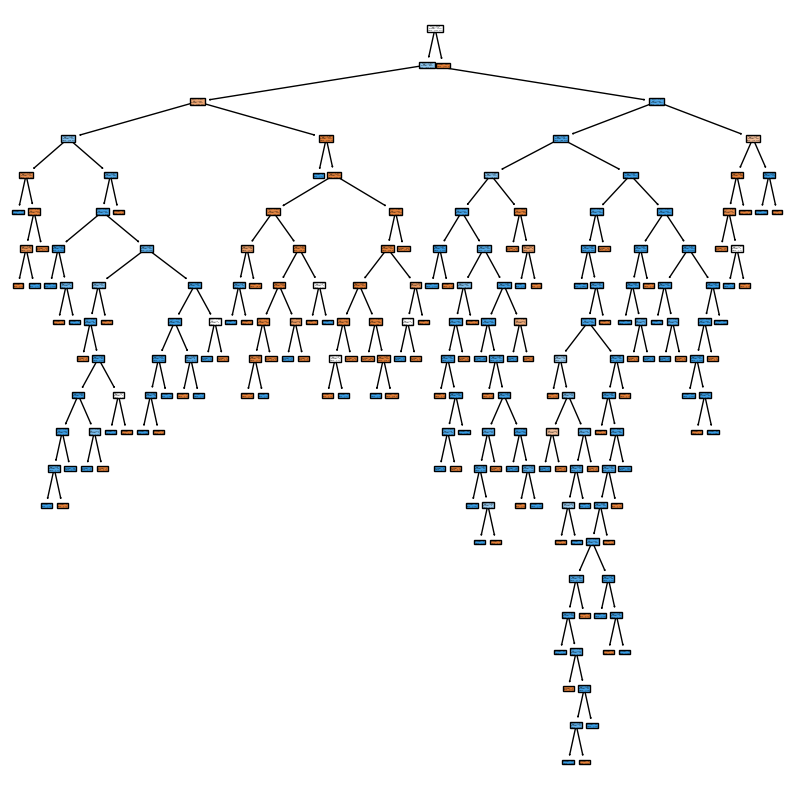

In [63]:
plt.figure(figsize=(10,10))
tree.plot_tree(model4,filled=True)
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [65]:
model5=RandomForestClassifier()

In [66]:
model5.fit(X_train_sc,y_train)

RandomForestClassifier()

In [67]:
y_pred5=model5.predict(X_test_sc)

In [68]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2490
           1       0.99      0.99      0.99      2438

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [69]:
model6=AdaBoostClassifier()

In [70]:
model6.fit(X_train_sc,y_train)

AdaBoostClassifier()

In [72]:
y_pred6=model6.predict(X_test_sc)

In [73]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2490
           1       0.98      0.98      0.98      2438

    accuracy                           0.98      4928
   macro avg       0.98      0.98      0.98      4928
weighted avg       0.98      0.98      0.98      4928



In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4928 entries, 11741 to 8495
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            4928 non-null   int64  
 1   type            4928 non-null   int64  
 2   amount          4928 non-null   float64
 3   oldbalanceOrg   4928 non-null   float64
 4   newbalanceOrig  4928 non-null   float64
 5   oldbalanceDest  4928 non-null   float64
 6   newbalanceDest  4928 non-null   float64
 7   isFlaggedFraud  4928 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 346.5 KB


In [80]:
model5.predict([[239,2,5178.72,400705.00,395526.28,0.00,0.00,1]])

array([0], dtype=int64)

In [83]:
model5.predict([[369,0,89596.79,89596.79,0.0,0.00,89596.79,1]])

array([1], dtype=int64)

In [84]:
data.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
16421,16,2,7103.96,20104.0,13000.04,0.00,0.00,0,0
16422,140,0,43690.08,870.0,0.00,3731535.62,3775225.70,0,0
16423,230,0,154215.09,21145.0,0.00,10486462.63,10640677.72,0,0
16424,181,3,79479.73,34497.0,113976.73,6386.08,0.00,0,0
16425,233,2,18123.97,0.0,0.00,0.00,0.00,0,0


In [86]:
model5.predict([[405,	1	,973805.75,	973805.75,	0.0	,0.00,	0.00,1]])

array([0], dtype=int64)